In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("Admission_Predict.csv")  # Make sure CSV is in your working directory
df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'}, inplace=True)


In [5]:
print(df.head())
print(df.describe())
print(df.isnull().sum())


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance_of_Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000 

In [7]:
X = df.drop(['Chance_of_Admit', 'Serial No.'], axis=1)
y = df['Chance_of_Admit']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


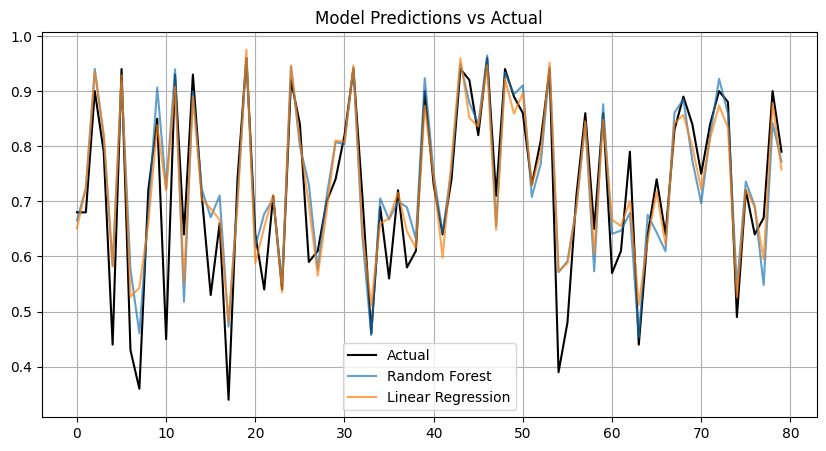

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color='black')
plt.plot(y_pred_rf, label="Random Forest", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", alpha=0.7)
plt.title("Model Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()
